In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60, 22995.00, 22732.25,24283.60,24683.35		]


In [12]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/nsv11154/Nov-06-2024-20-59-11_0.26271628570797767_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = output_results_pd_df[np.logical_and(output_results_pd_df["chi_squared"] < 25 , output_results_pd_df["Microturb"] > 4)]
# output_trimmed_vmic = (output_results_pd_df[)

output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [13]:
output_trimmed_vmic

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,NSV11154_clean.txt,22978.00,22976.0,22980.0,-2.5,0.0,-1.1419,5.0,6.0,0.0,9.862025,721.1124,0,10000000
1,NSV11154_clean.txt,23295.50,23293.0,23298.0,-2.5,0.0,-1.3399,5.0,6.0,0.0,24.531188,827.3499,0,10000000
2,NSV11154_clean.txt,23304.50,23302.0,23307.0,-2.5,0.0,-1.6019,5.0,6.0,0.0,4.998707,597.3314,0,10010000
3,NSV11154_clean.txt,23322.00,23320.0,23324.0,-2.5,0.0,-1.3646,5.0,6.0,0.0,19.897337,655.6190,0,10000000
4,NSV11154_clean.txt,23373.00,23371.5,23374.5,-2.5,0.0,-1.2933,5.0,6.0,0.0,11.775343,600.6063,0,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,NSV11154_clean.txt,23437.95,23436.7,23439.2,-2.5,0.0,-1.0655,9.0,6.0,0.0,17.882534,208.3309,0,10000000
64,NSV11154_clean.txt,23669.50,23668.0,23671.0,-2.5,0.0,-1.5336,9.0,6.0,0.0,2.747017,509.2237,0,10000000
65,NSV11154_clean.txt,23759.00,23757.5,23760.5,-2.5,0.0,-1.4320,9.0,6.0,0.0,23.131834,484.9576,0,10000000
66,NSV11154_clean.txt,24269.00,24267.0,24271.0,-2.5,0.0,-1.4123,9.0,6.0,0.0,14.066250,515.5862,0,11000000


5.0 0.000279017588688365 9
6.0 0.0003047337784714257 11
7.0 0.0002987734787369763 10
8.0 0.0002863421363305792 10
9.0 0.00027061160819265355 10


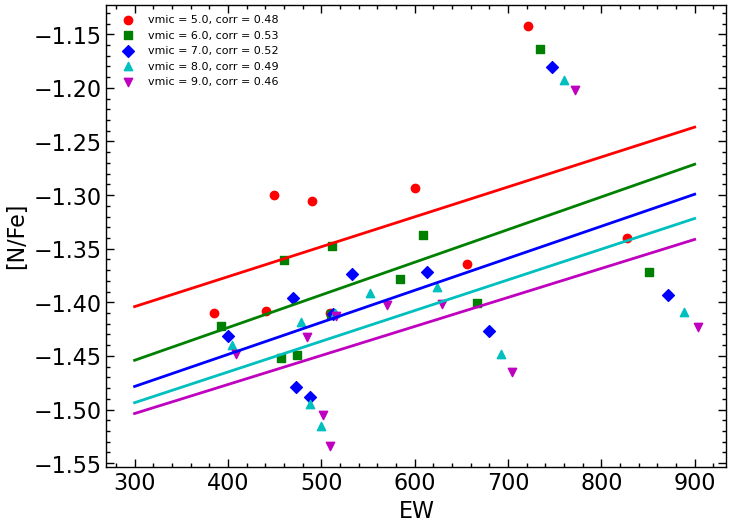

In [15]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y', 'r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p','^', 'v', 'p','^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["O_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.logical_and(np.abs(nfes - mean_nfe) < 3*std_nfe, nfes > -1.6))
    choose_idxs = choose_idxs[0]
    choose_idxs2 = np.where(ews[choose_idxs] > 210)
    choose_idxs2 = choose_idxs2[0]
    choose_idxs = choose_idxs[choose_idxs2]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(300, 900, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [7]:
output_trimmed3

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
48,WISEJ1942_clean.txt,22978.00,22976.0,22980.0,-1.3188,0.0,-1.2169,9.0,4.0,0.0,14.207858,1039.9767,0,0
49,WISEJ1942_clean.txt,23295.50,23293.0,23298.0,-1.7573,0.0,-1.1660,9.0,4.0,0.0,8.328142,1409.9866,0,0
50,WISEJ1942_clean.txt,23304.50,23302.0,23307.0,-1.7054,0.0,-1.4059,9.0,4.0,0.0,13.220049,1119.8522,0,0
51,WISEJ1942_clean.txt,23322.00,23320.0,23324.0,-2.5000,0.0,-1.4358,9.0,4.0,0.0,7.373634,954.2534,0,10000000
52,WISEJ1942_clean.txt,23362.10,23360.7,23363.5,-1.1932,0.0,-1.4376,9.0,4.0,0.0,8.521063,844.3645,0,0
53,WISEJ1942_clean.txt,23373.00,23371.5,23374.5,-0.0462,0.0,-1.3648,9.0,4.0,0.0,4.246037,897.6341,0,1000
54,WISEJ1942_clean.txt,23421.10,23419.5,23422.7,-2.1773,0.0,-1.3314,9.0,4.0,0.0,2.812632,841.1754,0,0
55,WISEJ1942_clean.txt,23434.00,23432.0,23436.0,-1.6355,0.0,-1.2831,9.0,4.0,0.0,6.233403,890.2358,0,0
56,WISEJ1942_clean.txt,23437.95,23436.7,23439.2,-1.5218,0.0,-1.2609,9.0,4.0,0.0,7.910969,316.7491,0,0
57,WISEJ1942_clean.txt,23669.50,23668.0,23671.0,-0.9797,0.0,-1.5320,9.0,4.0,0.0,13.747159,748.4626,0,0


In [8]:
output_trimmed3

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
48,WISEJ1942_clean.txt,22978.00,22976.0,22980.0,-1.3188,0.0,-1.2169,9.0,4.0,0.0,14.207858,1039.9767,0,0
49,WISEJ1942_clean.txt,23295.50,23293.0,23298.0,-1.7573,0.0,-1.1660,9.0,4.0,0.0,8.328142,1409.9866,0,0
50,WISEJ1942_clean.txt,23304.50,23302.0,23307.0,-1.7054,0.0,-1.4059,9.0,4.0,0.0,13.220049,1119.8522,0,0
51,WISEJ1942_clean.txt,23322.00,23320.0,23324.0,-2.5000,0.0,-1.4358,9.0,4.0,0.0,7.373634,954.2534,0,10000000
52,WISEJ1942_clean.txt,23362.10,23360.7,23363.5,-1.1932,0.0,-1.4376,9.0,4.0,0.0,8.521063,844.3645,0,0
53,WISEJ1942_clean.txt,23373.00,23371.5,23374.5,-0.0462,0.0,-1.3648,9.0,4.0,0.0,4.246037,897.6341,0,1000
54,WISEJ1942_clean.txt,23421.10,23419.5,23422.7,-2.1773,0.0,-1.3314,9.0,4.0,0.0,2.812632,841.1754,0,0
55,WISEJ1942_clean.txt,23434.00,23432.0,23436.0,-1.6355,0.0,-1.2831,9.0,4.0,0.0,6.233403,890.2358,0,0
56,WISEJ1942_clean.txt,23437.95,23436.7,23439.2,-1.5218,0.0,-1.2609,9.0,4.0,0.0,7.910969,316.7491,0,0
57,WISEJ1942_clean.txt,23669.50,23668.0,23671.0,-0.9797,0.0,-1.5320,9.0,4.0,0.0,13.747159,748.4626,0,0


In [82]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/nsv11154/Nov-06-2024-23-35-56_0.41370174054112785_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20.03])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [77]:
remove = [22804.50	, 23336.60,22799.60	]
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(remove)]

In [83]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,NSV11154_clean.txt,22743.35,22742.0,22744.7,2.9805,0.0,-0.1170,6.0,8.0,0.0,3.383732,190.7552,0,0
1,NSV11154_clean.txt,22799.60,22798.0,22801.2,2.3531,0.0,0.1709,6.0,8.0,0.0,3.371348,313.4624,0,0
2,NSV11154_clean.txt,22804.50,22802.0,22807.0,-2.5000,0.0,0.0013,6.0,8.0,0.0,7.564295,390.9382,0,10000000
3,NSV11154_clean.txt,22868.25,22867.0,22869.5,4.0000,0.0,0.2188,6.0,8.0,0.0,1.125643,215.0622,0,10000000
5,NSV11154_clean.txt,23067.25,23065.0,23069.5,-1.7352,0.0,0.1736,6.0,8.0,0.0,1.535112,485.3533,0,0
6,NSV11154_clean.txt,23336.60,23333.5,23339.7,-2.5000,0.0,0.0686,6.0,8.0,0.0,11.000002,521.8024,0,10000000


In [84]:
(np.mean(output_trimmed["C_Fe"])+8.56).round(2), np.std(output_trimmed["C_Fe"]).round(2)

(np.float64(8.65), np.float64(0.12))

In [42]:
np.mean(output_trimmed["N_Fe"]).round(2)+solar_abundances['N'], np.std(output_trimmed["N_Fe"]).round(2)

(np.float64(8.030000000000001), np.float64(0.08))

In [60]:
# plot_one_star(config_dict, "NSV11154_clean.txt");

In [85]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/nsv11154/Nov-06-2024-23-39-18_0.8450008227518834_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 40])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [86]:
output_trimmed = output_trimmed[output_trimmed['flag_warning']<10000000]
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
2,NSV11154_clean.txt,22659.60,22657.90,22661.3,-1.0011,0.0,-0.1807,6.0,8.0,0.0,2.176053,447.6410,0,0
5,NSV11154_clean.txt,22718.90,22717.50,22720.3,-1.4643,0.0,0.0749,6.0,8.0,0.0,4.470934,275.1916,0,0
6,NSV11154_clean.txt,22729.50,22727.00,22732.0,-2.7897,0.0,-0.2341,6.0,8.0,0.0,5.752077,404.6437,0,0
7,NSV11154_clean.txt,22754.00,22752.00,22756.0,-2.4148,0.0,-0.0838,6.0,8.0,0.0,5.617752,349.0180,0,0
8,NSV11154_clean.txt,22789.55,22787.50,22791.6,-0.1171,0.0,-0.0863,6.0,8.0,0.0,10.950550,369.8074,0,1000
9,NSV11154_clean.txt,22817.75,22816.50,22819.0,-1.2713,0.0,-0.2647,6.0,8.0,0.0,6.620441,337.1380,0,0
10,NSV11154_clean.txt,22828.00,22826.00,22830.0,2.0921,0.0,-0.2621,6.0,8.0,0.0,3.264392,390.4880,0,0
11,NSV11154_clean.txt,22881.75,22878.50,22885.0,0.0426,0.0,-0.0581,6.0,8.0,0.0,10.256453,756.5681,0,0
12,NSV11154_clean.txt,22895.50,22894.00,22897.0,1.0271,0.0,-0.1738,6.0,8.0,0.0,10.453509,260.0173,0,0
13,NSV11154_clean.txt,22915.50,22913.50,22917.5,-0.0511,0.0,-0.2653,6.0,8.0,0.0,4.018180,364.1691,0,0


In [87]:
(np.mean(output_trimmed["N_Fe"])+7.98).round(3), np.std(output_trimmed["N_Fe"]).round(3)

(np.float64(7.848), np.float64(0.136))

In [88]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/nsv11154/vmac', sep='  ')

/tmp/ipykernel_652235/313650587.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/nsv11154/vmac', sep='  ')


In [89]:
fitlist

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Na),A(S),A(Fe),A(N),A(Ca),A(Si),A(Mg),A(Ti),A(Ni),oisorat
0,NSV11154_clean.txt,0.0,5250.0,1.0,0.0,6.0,7.5,11.5,8.65,7.4,5.49,6.16,6.6,7.915,5.37,6.59,6.55,3.94,5.24,8.0


In [98]:
rats = np.linspace(4, 15, 10)


In [99]:
# rats = np.arange(20, 200,10)
rats = np.round(np.repeat(rats, 4),4)
rats

array([ 4.    ,  4.    ,  4.    ,  4.    ,  5.2222,  5.2222,  5.2222,
        5.2222,  6.4444,  6.4444,  6.4444,  6.4444,  7.6667,  7.6667,
        7.6667,  7.6667,  8.8889,  8.8889,  8.8889,  8.8889, 10.1111,
       10.1111, 10.1111, 10.1111, 11.3333, 11.3333, 11.3333, 11.3333,
       12.5556, 12.5556, 12.5556, 12.5556, 13.7778, 13.7778, 13.7778,
       13.7778, 15.    , 15.    , 15.    , 15.    ])

In [100]:
len(rats)

40

In [101]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
# fitlist2

In [102]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/nsv11154/comb', sep=' ', index=False)

In [195]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/aoher/Nov-06-2024-05-51-21_0.1290032145527411_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wisej1942/Nov-04-2024-14-18-20_0.4633512438312559_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')

# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wisej1942/Nov-03-2024-13-23-31_0.41070702154497307_LTE_O_1D/output"
# df3 = pd.read_csv(allpath, sep='\t')

# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wisej1942/Nov-03-2024-22-25-12_0.09688269001907202_LTE_O_1D/output"
# df4 = pd.read_csv(allpath, sep='\t')

In [196]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
# rats = np.unique(df3['oisorat'])
# rats2 = np.unique(df4['oisorat'])

In [197]:
df_fine

,specname,O_Fe,Doppler_Shift_add_to_RV,chi_squared,vmac,red_chi_squared,oisorat
0,AOHer_clean.txt,-0.8724,-1.794419,4.296421,8.0,12.418744,30.00
1,AOHer_clean.txt,-0.8724,-1.755255,4.037884,8.0,11.778495,35.12
2,AOHer_clean.txt,-0.8724,-1.749276,3.852714,8.0,11.343440,41.12
3,AOHer_clean.txt,-0.8724,-1.772818,3.726184,8.0,11.075581,48.14
4,AOHer_clean.txt,-0.8724,-1.759062,3.644456,8.0,10.926157,56.37
5,AOHer_clean.txt,-0.8724,-1.770770,3.597841,8.0,10.878967,65.99
6,AOHer_clean.txt,-0.8724,-1.732843,3.576503,8.0,10.891007,77.26
7,AOHer_clean.txt,-0.8724,-1.732138,3.573489,8.0,10.959623,90.46
8,AOHer_clean.txt,-0.8724,-1.742732,3.583053,8.0,11.062630,105.91
9,AOHer_clean.txt,-0.8724,-1.766463,3.600589,8.0,11.187786,123.99


In [198]:
# import numpy as np
# import pandas as pd
from astropy.stats import sigma_clip


# df_fine = df1
# df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    subdf.sort_values(by='red_chi_squared', inplace=True)
    subdf = subdf.iloc[:2]
    # Sigma clipping for red_chi_squared
    # clipped_chi = sigma_clip(subdf['red_chi_squared'], sigma=10, maxiters=5)
    clipped_chi = subdf['red_chi_squared']
    meanchi = np.mean(clipped_chi)
    stdchi = np.std(clipped_chi)
    
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

print("RVs:", rvs)
print("Mean Chi:", chis)
print("Std Chi:", dchis)
print("O Abundances:", oabunds)
print("Std O Abundances:", doabunds)

RVs: [np.float64(-1.7944189613012198), np.float64(-1.7552548629393598), np.float64(-1.749275531683304), np.float64(-1.772818484443009), np.float64(-1.759062172717049), np.float64(-1.7707697693563609), np.float64(-1.7328432425035705), np.float64(-1.7321375207428829), np.float64(-1.7427324342152408), np.float64(-1.7664629190398369), np.float64(-1.738061719392845), np.float64(-1.75346526173642), np.float64(-1.780505312325536), np.float64(-1.75911831251089), np.float64(-1.761050914208369), np.float64(-1.7527265662822014), np.float64(-1.7684049249976517), np.float64(-1.7663245618924963), np.float64(-1.7511153100598924), np.float64(-1.7562187612702491)]
Mean Chi: [np.float64(12.418744382262409), np.float64(11.778494772844438), np.float64(11.343440372823494), np.float64(11.07558135417261), np.float64(10.92615733257628), np.float64(10.878967190385348), np.float64(10.891006895477952), np.float64(10.959622793420126), np.float64(11.062629656372923), np.float64(11.18778587568159), np.float64(11.30

/tmp/ipykernel_566422/3850312742.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


In [199]:
rats

array([ 30.  ,  35.12,  41.12,  48.14,  56.37,  65.99,  77.26,  90.46,
       105.91, 123.99, 145.17, 169.96, 198.99, 232.97, 272.76, 319.34,
       373.87, 437.72, 512.48, 600.  ])

69.03 227.74 -34.66


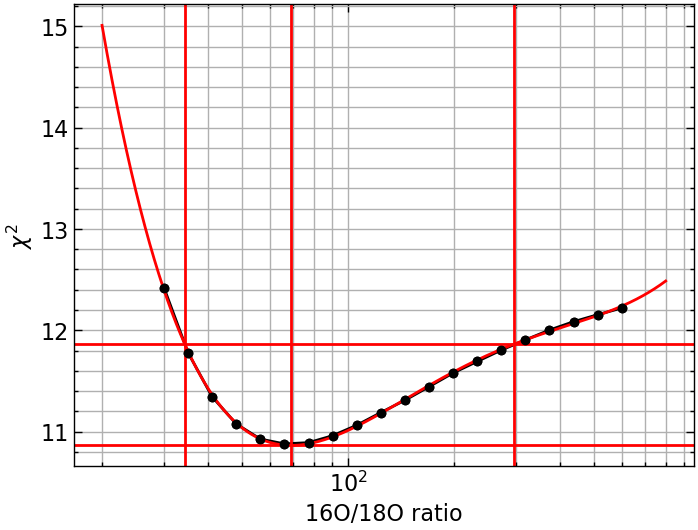

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with actual data)
# rats = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
# chis = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8])
# dchis = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Plot the original data
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
plt.grid(which='both')

# Take the logarithm of rats
log_rats = np.log(rats)

# Fit a 2nd degree polynomial weighted by the errors
p = np.polyfit(log_rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(np.log(20), np.log(800), 4000)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x_original, y, 'r')
plt.axvline(x_original[np.where(y == np.min(y))], color='r')
xfit = x_original[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x_original[idx] - xfit).round(2), (x_original[idx2] - xfit).round(2)
plt.axvline(x_original[idx], color='r')
plt.axvline(x_original[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

In [189]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/aoher/Nov-06-2024-05-36-30_0.4129356695148876_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 30])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [190]:
(np.mean(output_trimmed["O_Fe"])+solar_abundances['O']).round(3), np.std(output_trimmed["O_Fe"]).round(3)

(np.float64(7.898), np.float64(0.141))

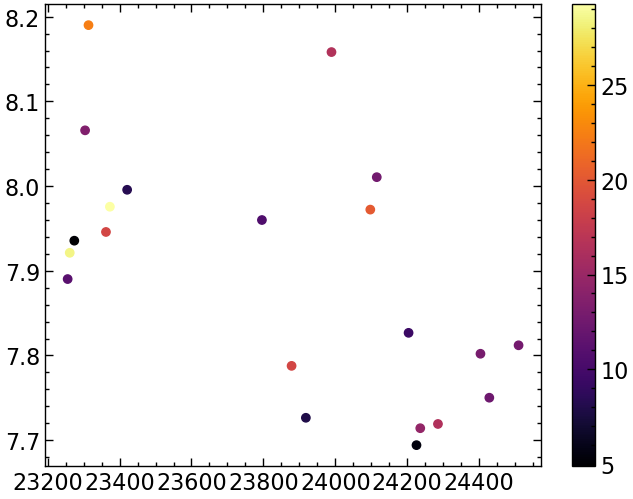

In [191]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [192]:
np.mean(output_trimmed["O_Fe"])

np.float64(-0.8722523809523808)

In [193]:
np.min(rvs)

np.float64(-1.4026913513875843)

In [194]:
np.max(rvs)

np.float64(-1.2162136746387886)